In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Tensorboard for experimentation analysis
# %load_ext tensorboard
# %tensorboard --logdir log

In [6]:
# Turn data into tensors
spotify_df = pd.read_csv("spotify_data.csv",encoding="ISO-8859-1")
spotify_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3.0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4.0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4.0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4.0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4.0


In [9]:
selected_features = ['energy', 'loudness', 'liveness', 'instrumentalness', 'danceability']
spotify_df = spotify_df[selected_features]

# Normalise the data using Min-Max scaling
scaler = MinMaxScaler()
spotify_df[selected_features[:-1]] = scaler.fit_transform(spotify_df[selected_features[:-1]])

# Split data into training and testing sets
X = spotify_df[selected_features[:-1]]
y = spotify_df['danceability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
spotify_df.danceability.unique()

array([0.483 , 0.572 , 0.409 , ..., 0.0513, 0.988 , 0.0441])

In [14]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to binary classification (0 or 1) based on threshold
threshold = 0.5
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Train the model
model.fit(X_train, y_train_binary, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
6974/6974 [==============================] - 18s 3ms/step - loss: 0.6038 - accuracy: 0.6819 - val_loss: 0.5986 - val_accuracy: 0.6842
Epoch 2/20
6974/6974 [==============================] - 18s 3ms/step - loss: 0.5945 - accuracy: 0.6905 - val_loss: 0.5941 - val_accuracy: 0.6875
Epoch 3/20
6974/6974 [==============================] - 20s 3ms/step - loss: 0.5927 - accuracy: 0.6914 - val_loss: 0.5943 - val_accuracy: 0.6868
Epoch 4/20
6974/6974 [==============================] - 18s 3ms/step - loss: 0.5916 - accuracy: 0.6918 - val_loss: 0.5911 - val_accuracy: 0.6903
Epoch 5/20
6974/6974 [==============================] - 18s 3ms/step - loss: 0.5907 - accuracy: 0.6928 - val_loss: 0.5910 - val_accuracy: 0.6911
Epoch 6/20
6974/6974 [==============================] - 17s 2ms/step - loss: 0.5901 - accuracy: 0.6927 - val_loss: 0.5898 - val_accuracy: 0.6908
Epoch 7/20
6974/6974 [==============================] - 20s 3ms/step - loss: 0.5897 - accuracy: 0.6935 - val_loss: 0.5899 - val_ac

In [15]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error (MAE) on test set: {mae}")


2180/2180 [==============================] - 4s 2ms/step - loss: 0.7189 - accuracy: 0.0011
Mean Absolute Error (MAE) on test set: 0.0011471343459561467


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test_binary)
print(f"Accuracy on test set: {accuracy}")


# Predict probabilities on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > threshold).astype('int')  # Applying threshold manually

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification Report
class_report = classification_report(y_test_binary, y_pred)
print(f"Classification Report:\n{class_report}")

# F1-score
f1 = f1_score(y_test_binary, y_pred)
print(f"F1-score: {f1}")

# Recall
recall = recall_score(y_test_binary, y_pred)
print(f"Recall: {recall}")


2180/2180 [==============================] - 4s 2ms/step - loss: 0.5914 - accuracy: 0.6897
Accuracy on test set: 0.689671516418457
2180/2180 [==============================] - 3s 1ms/step
Confusion Matrix:
[[15286 12685]
 [ 8957 32811]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59     27971
           1       0.72      0.79      0.75     41768

    accuracy                           0.69     69739
   macro avg       0.68      0.67      0.67     69739
weighted avg       0.68      0.69      0.69     69739

F1-score: 0.7519939493949395
Recall: 0.7855535338057843


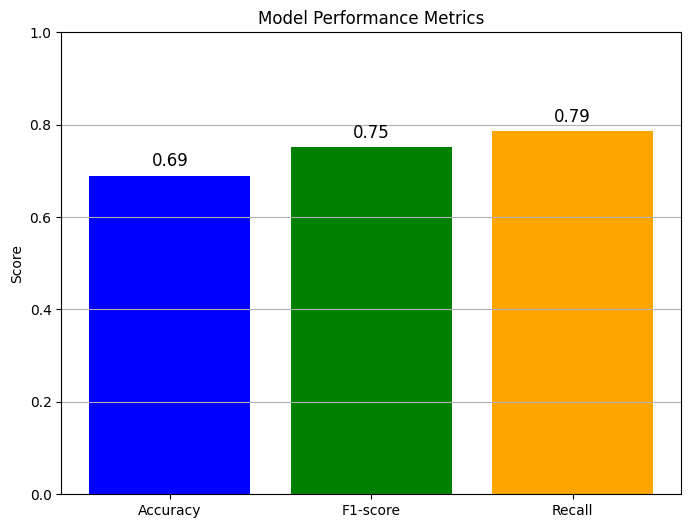

In [20]:
# Data for plotting
metrics = ['Accuracy', 'F1-score', 'Recall']
scores = [accuracy, f1, recall]

# Bar plot for performance metri
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 (for accuracy and F1 score)
plt.grid(axis='y')

# Show the scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', color='black', fontsize=12)

plt.show()

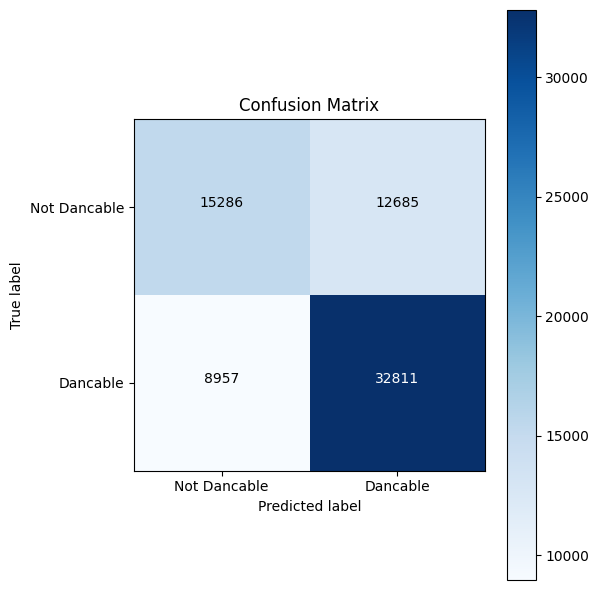

In [22]:

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['Not Dancable', 'Dancable']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Display numerical values in cells
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()